### This notebook is for both benchmark model and evaluation metric choice [task 1 & 2 ]

In [1]:
#importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# Importing the cleaned dataset

data = pd.read_csv('cleaned_nyctrip_data.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_of_week,pickup_hour_of_day,pickup_day,pickup_min,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2,0,16,29,40,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,4,23,11,35,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2,6,17,21,59,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,1,9,5,44,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,2,6,17,42,4.328540


In [3]:
# We wont need certain columns so we'll drop them

data.drop(['id','pickup_datetime','dropoff_datetime'],axis=1,inplace = True) 

# id has no contribution, pickup time we extracted necessary information and we have trip duration so we can remove drop time also

#### Converting the categorical col store_and_fwd_flag to numerical

In [4]:
# Using one hot encoding 

data = pd.get_dummies(data, columns = ['store_and_fwd_flag'])

In [5]:
# Shuffling the dataset to split into train and test
from sklearn.utils import shuffle

data = shuffle(data, random_state = 42)

#creating 4 divisions and using 3 parts for train and other for test
div = int(data.shape[0]/4)
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [6]:
train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day_of_week,pickup_hour_of_day,pickup_day,pickup_min,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y
421221,1,1,-73.983467,40.766060,-73.908745,40.713913,1020,6,2,2,15,46,8.558855,1,0
577442,2,1,-73.977921,40.786476,-73.953033,40.782887,1086,1,0,16,25,39,2.133011,1,0
374537,2,1,-73.961266,40.768841,-73.957413,40.774651,86,6,0,19,13,22,0.722916,1,0
396830,2,2,-73.973343,40.754379,-73.977364,40.749031,235,5,1,17,24,13,0.684374,1,0
594463,1,1,-73.992935,40.748081,-74.004181,40.721062,380,6,2,23,1,11,3.150309,1,0


In [7]:
test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day_of_week,pickup_hour_of_day,pickup_day,pickup_min,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y
543871,1,2,-74.006195,40.734596,-73.973900,40.763729,1406,4,5,11,30,19,4.230253,1,0
503387,2,1,-73.959557,40.769421,-73.951141,40.779301,273,2,0,16,29,49,1.307323,1,0
187152,1,1,-73.946251,40.695072,-73.907883,40.699188,919,3,0,2,14,58,3.266832,1,0
339309,1,1,-73.996262,40.754280,-73.990181,40.766556,213,1,2,18,20,3,1.457910,1,0
628055,1,1,-73.970039,40.759907,-73.981781,40.768353,685,5,0,15,9,44,1.363756,1,0


## Benchmark model using simple mean

## Evaluation metric used - RMSE

* The RMSE is used because it is most commonly used metric. Both MAE and RMSLE are good with outliers but since we did data cleaning and removed extreme outliers, RMSE is better than MAE. 
* In case of RMSLE, again, if outliers are extreme, it will scale them down and wont penalize them, but outliers have been removed to an extant. 
* MSE will change units and since we are dealing with trip duration, we need to maintain units (seconds) 

Hence considering the facts, we can use RMSE

* #### I have also used r-squared metric to evaluate the score of model which is needed for final task but RMSE is the evaluation metric

### Simple Mean ( mean of trip_duration)

In [8]:
# Storing in new column the values of mean for both train and test

train['simple_mean'] = train['trip_duration'].mean()
test['simple_mean'] = train['trip_duration'].mean()

In [9]:
#calculating root mean square error
from sklearn.metrics import mean_squared_error as MSE

simple_mean_error_test = np.sqrt(MSE(test['trip_duration'] , test['simple_mean']))

print("The RMSE of test set = {}".format(simple_mean_error_test))

The RMSE of test set = 659.3505375040452


In [10]:
# calculating the r2 score 

from sklearn.metrics import r2_score

print("The r2 score for train set is = {}\nThe r2 score for test set is = {}".format(r2_score(train['trip_duration'],train['simple_mean']),r2_score(test['trip_duration'] , test['simple_mean'])))

The r2 score for train set is = 0.0
The r2 score for test set is = -8.701520463905155e-05


* As we see, the r2 score for train set is 0 since it is the train set of baseline model. 

### Plotting the correlation heat map to see which variables to use for benchmark based on high correlation

Text(0.5, 1.0, 'Correlation Plot')

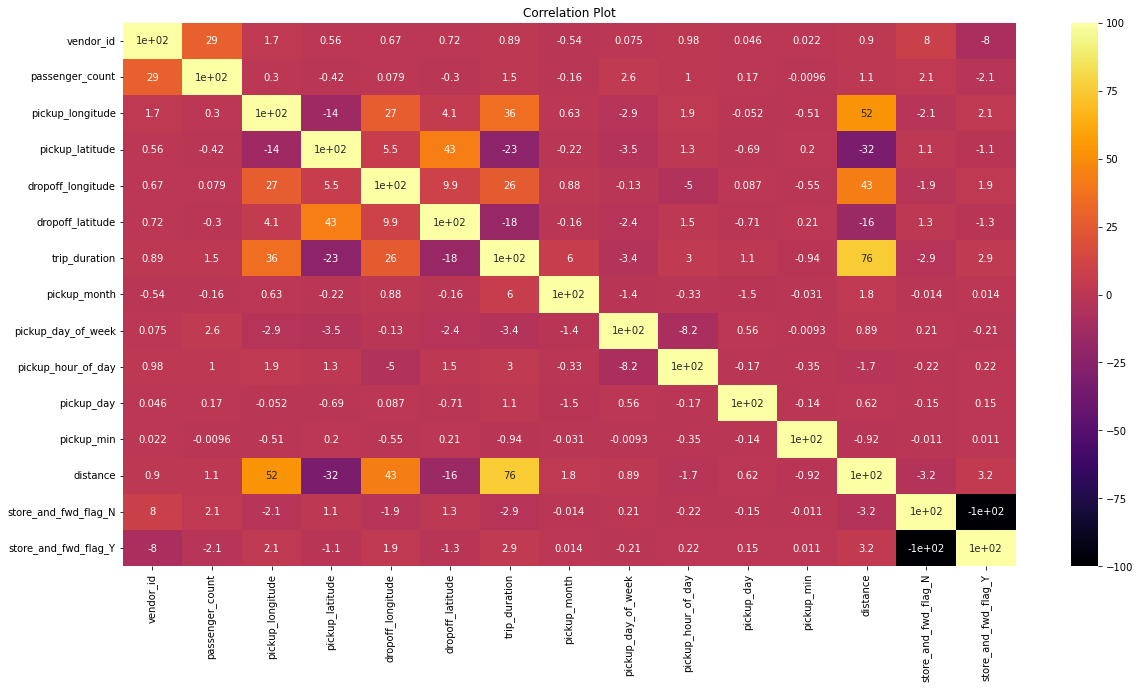

In [11]:
#Plotting Pearson Correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(data.corr()*100, annot=True, cmap='inferno')
plt.title('Correlation Plot')

* As we see, there is high correlation between distance and trip duration , so we'll use that for our next model.

### Trip_distance with respect to distance

* For this we will use linear regression fit

In [12]:
#importing train test split and splitting the data 

from sklearn.model_selection import train_test_split

x = data[['distance']]
y = data['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((507612, 1), (217549, 1), (507612,), (217549,))

In [13]:
# Now to use linear regression and fitting the data

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [14]:
# Printing the scores of training and testing along with RMSE value

print('The RMSE value = {}\nThe training score = {}\nThe testing score = {}'.format(np.sqrt(MSE(lr_pred, y_test)),lr.score(X_train, y_train),lr.score(X_test, y_test)))

The RMSE value = 428.1578506333879
The training score = 0.5703467799032694
The testing score = 0.5754914573972338


* As we see, the RMSE score has reduced owing to the high correlation of distance, adding few more correlated terms will give better RMSE value

### Trip_distance with respect to high correlated variables

* We will now consider strong high correlation (>10) as a factor. It might be possible that the variables might not have actual effect on target variable, i.e) correlation-causation, but for benchmark model, we can use it as a baseline

In [15]:
# using variables with strong correlation > 10

x2 = data[['distance','passenger_count','pickup_longitude','dropoff_longitude','pickup_day']]
y2 = data['trip_duration']

X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30, random_state=10)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((507612, 5), (217549, 5), (507612,), (217549,))

In [16]:
# Now to use linear regression and fitting the data

lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
lr2_pred = lr2.predict(X2_test)

In [17]:
# Printing the scores of training and testing along with RMSE value

print('The RMSE value = {}\nThe training score = {}\nThe testing score = {}'.format(np.sqrt(MSE(lr2_pred, y2_test)),lr2.score(X2_train, y2_train),lr2.score(X2_test, y2_test)))

The RMSE value = 424.46158351617896
The training score = 0.5776630120520072
The testing score = 0.5827893452839361


* As we see, the RMSE decreased and the score also improved slightly

In [20]:
# now to store the score of the 2 benchmark models 

score_df = pd.DataFrame({'model':['Benchmark_1','Benchmark_2'],'train_score':[0.5703467799032694,0.5776630120520072],'test_score':[0.5754914573972338,0.5827893452839361]})

In [21]:
# Saving score_df in csv file to update for other models

score_df.to_csv('score.csv',index=False)